# Analysis

Create your own EDA below! Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

In [60]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
# import coffee data
coffee = pd.read_csv("../data/crop/coffee_output.csv")

# import weather data
weather = pd.read_csv("../data/weather/weather.csv")

In [62]:
# TODO: Merge these two dataframes together

wc_combined = pd.merge(left=weather, 
                       right=coffee, 
                       on= ["year","subdivision"], 
                       how="inner")
wc_combined.to_csv('weather_crop.csv', index=False)

In [63]:
# TODO: View the first 5 rows of your data

wc_combined.head()

,year,rain_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg,subdivision,country,type,60kgs_bag,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,2006,6.670968,21.803087,27.190323,18.654839,97.129032,57.806452,9.706452,2.075207,Minas Gerais,Brazil,Arabica,16.30,581.0,5330.0,175.0,2298.0,2319.0,3320.0
1,2007,1.866250,23.040999,27.649375,18.753125,87.837500,48.493750,8.749375,2.069605,Minas Gerais,Brazil,Arabica,23.70,563.0,5730.0,186.0,2245.0,2552.0,3030.0
2,2008,3.777049,20.682400,27.000000,16.216393,96.136612,51.415301,8.865027,1.584408,Minas Gerais,Brazil,Arabica,16.85,679.0,5720.0,196.0,2235.0,2559.0,3468.0
3,2009,3.380220,21.023802,27.769231,16.410440,96.054945,49.329670,9.114286,1.611746,Minas Gerais,Brazil,Arabica,25.55,663.0,5770.0,188.0,2223.0,2596.0,3527.0
4,2010,2.183516,21.444293,28.580769,16.156044,95.247253,44.648352,9.109341,1.455907,Minas Gerais,Brazil,Arabica,22.10,873.0,5725.0,244.0,2151.0,2662.0,3578.0


In [64]:
# TODO: Check for null values 

wc_combined.isnull

<bound method DataFrame.isnull of     year  rain_max   temp_avg   temp_max   temp_min    hum_max    hum_min  \
0   2006  6.670968  21.803087  27.190323  18.654839  97.129032  57.806452   
1   2007  1.866250  23.040999  27.649375  18.753125  87.837500  48.493750   
2   2008  3.777049  20.682400  27.000000  16.216393  96.136612  51.415301   
3   2009  3.380220  21.023802  27.769231  16.410440  96.054945  49.329670   
4   2010  2.183516  21.444293  28.580769  16.156044  95.247253  44.648352   
5   2011  2.601786  20.959536  27.735714  16.318132  96.060440  49.252747   
6   2012  2.255738  21.030624  28.406011  16.003279  96.060109  46.366120   
7   2013  3.079121  21.088660  27.976923  16.386813  96.802198  49.390110   
8   2014  1.617582  21.163462  28.406044  15.684066  96.214286  44.824176   
9   2015  2.876923  21.346828  28.487912  16.475275  97.450549  48.406593   
10  2016  2.641860  21.630402  28.855233  16.705233  97.587209  47.587209   
11  2017  2.052459  21.404627  28.433607  

In [78]:
# TODO: Drop rows that contain null values

wc_combined.dropna(inplace=True)
wc_combined.isnull().sum()

year                            0
rain_max                        0
temp_avg                        0
temp_max                        0
temp_min                        0
hum_max                         0
hum_min                         0
wind_max                        0
wind_avg                        0
subdivision                     0
country                         0
type                            0
60kgs_bag                       0
nonbearing_trees                0
bearing_trees                   0
nonbear_hectares                0
bearing_hectares                0
bearing_trees_per_hectare       0
nonbearing_trees_per_hectare    0
dtype: int64

# EDA BEGINS HERE!


In [79]:

# Calculate the Pearson correlation between average temperature and 60 kgs bags
correlation = wc_combined['temp_avg'].corr(wc_combined['60kgs_bag'])

# Print the correlation value rounded to two decimal places
print(f"The correlation between the average temperature and 60kgs coffee bags is {correlation:.2f}")

The correlation between the average temperature and 60kgs coffee bags is -0.12


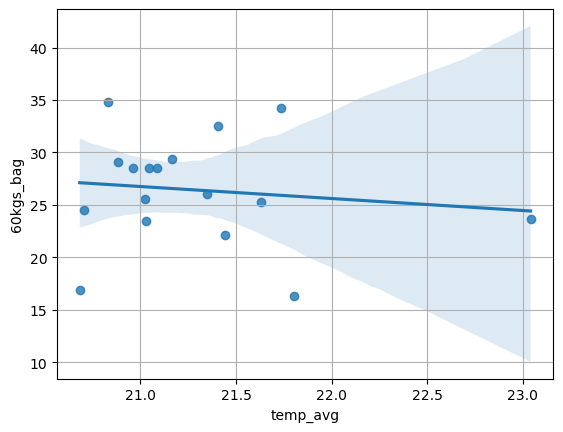

In [81]:
# Create a scatter plot with a regression line showing the relationship average temperature and 60 kgs bags
sns.regplot(x='temp_avg', 
            y='60kgs_bag', 
            data=wc_combined)
plt.grid(True)
plt.show()

What is the relationship between temp_avg and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer: The relationship between the average temperature and 60kgs bags of coffee produced is very weak, with the Pearson's correlation being -0.12. This leads me to conclude that there is little to no relationship between the average temperature and the coffee produced for this specific data set.

In [82]:
# Calculate the Pearson correlation between minimum humidity and 60 kgs bags
correlation = wc_combined['hum_min'].corr(wc_combined['60kgs_bag'])

# Print the correlation value rounded to two decimal places
print(f"The correlation between the minimum humidity and 60kgs coffee bags is {correlation:.2f}")

The correlation between the minimum humidity and 60kgs coffee bags is -0.54


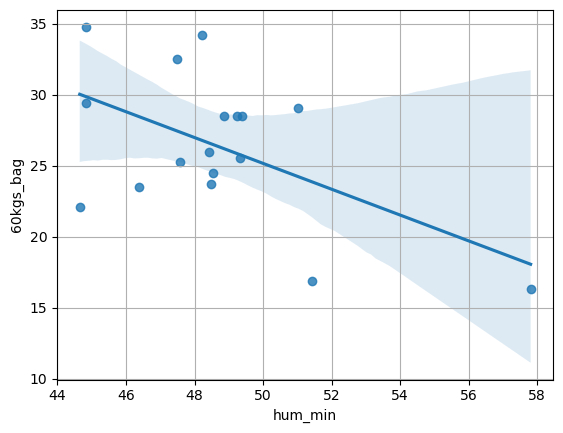

In [83]:
# Create a scatter plot with a regression line showing the relationship minimum humidity and 60 kgs bags
sns.regplot(x='hum_min', 
            y='60kgs_bag', 
            data=wc_combined)
plt.grid(True)
plt.show()

What is the relationship between minimum humidity and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer: The relationship between the minimum humidity and 60kgs bags of coffee produced is moderately negative, with the Pearson's correlation being -0.54. This leads me to conclude that as the minimum humidity decreases, the amount of coffee produced increases, and the opposite would be true (if humidity increases, coffee produced decreases).

In [84]:
# Calculate the Pearson correlation between maximum rain and 60 kgs bags
correlation = wc_combined['rain_max'].corr(wc_combined['60kgs_bag'])

# Print the correlation value rounded to two decimal places
print(f"The correlation between the maximum rainn and 60kgs coffee bags is {correlation:.2f}")

The correlation between the maximum rainn and 60kgs coffee bags is -0.40


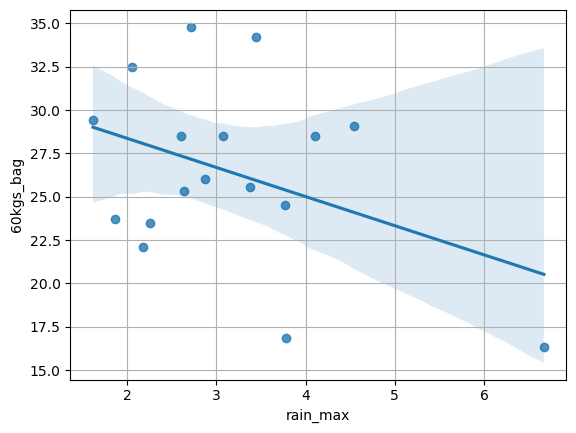

In [85]:
# Create a scatter plot with a regression line showing the relationship maximum rain and 60 kgs bags
sns.regplot(x='rain_max',
            y='60kgs_bag',
            data=wc_combined)
plt.grid(True)
plt.show()

What is the relationship between rain_max and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer: The relationship between the maximum rain and 60kgs bags of coffee produced is a weak to moderate negative relationship, with the Pearson's correlation being -0.39. This leads me to conclude that as the rain increases, the amount of coffee produced slightly decreases.

In [86]:
# Calculate the Pearson correlation between average wind and 60 kgs bags
correlation = wc_combined['wind_avg'].corr(wc_combined['60kgs_bag'])

# Print the correlation value rounded to two decimal places
print(f"The correlation between the average wind speed and 60kgs coffee bags is {correlation:.2f}")

The correlation between the average wind speed and 60kgs coffee bags is -0.71


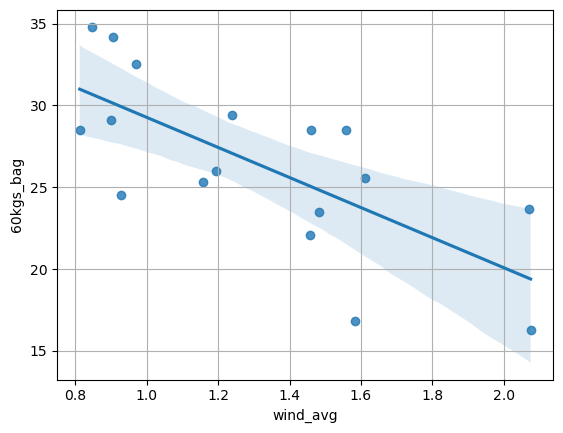

In [87]:
# Create a scatter plot with a regression line showing the relationship average wind speed and 60 kgs bags
sns.regplot(x='wind_avg', 
            y='60kgs_bag', 
            data=wc_combined)
plt.grid(True)
plt.show()

What is the relationship between average wind speed and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

Answer: The relationship between the average wind speed and 60kgs bags of coffee produced is a strong negative relationship, with the Pearson's correlation being -0.70. This leads me to conclude that as the wind increases, the amount of coffee produced slightly decreases.

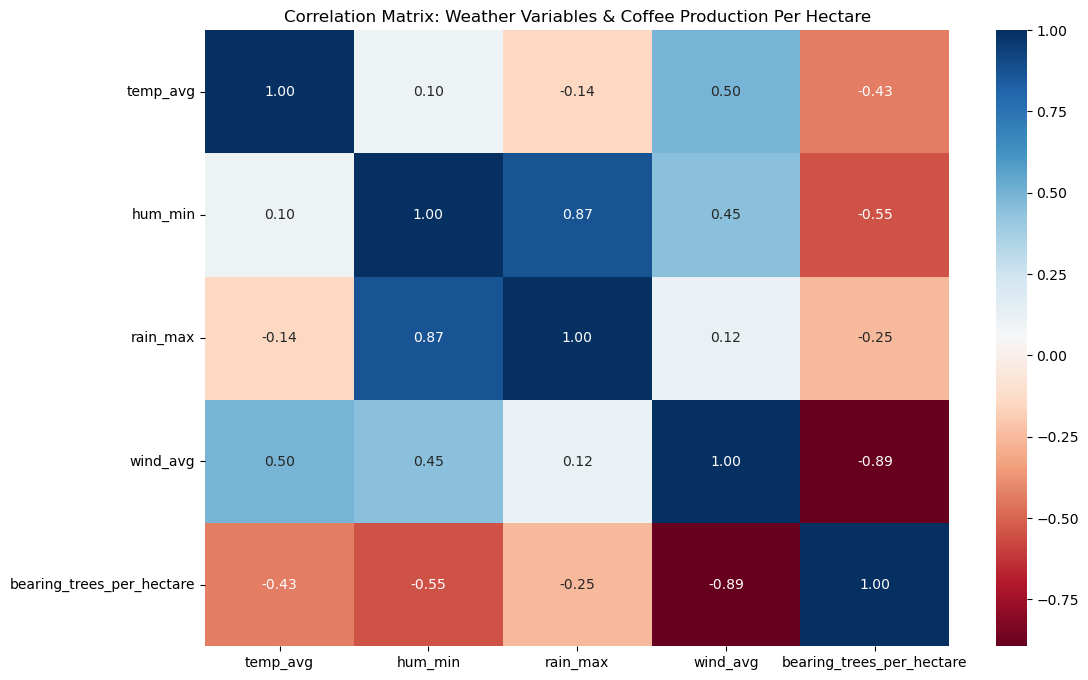

In [90]:

# Define the weather and coffee-related columns to include in the correlation analysis
weather_columns = ['temp_avg', 'hum_min', 'rain_max', 'wind_avg', 'bearing_trees_per_hectare']

# Calculate the Pearson correlation matrix between selected columns
correlation_matrix = wc_combined[weather_columns].corr(method='pearson')

# Create a heatmap to visualize the strength and direction of correlations
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt=".2f")
plt.title('Correlation Matrix: Weather Variables & Coffee Production Per Hectare')
plt.show()

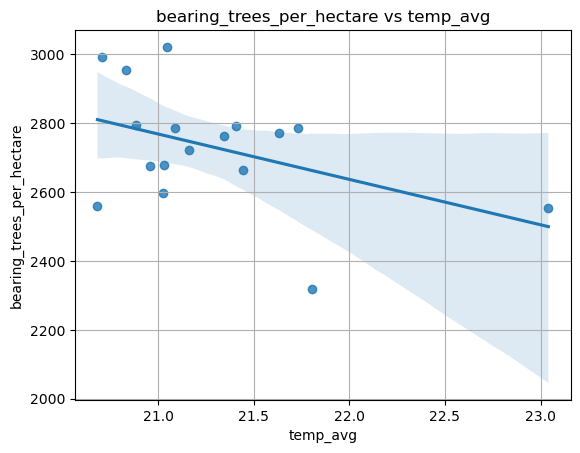

Pearson correlation between bearing_trees_per_hectare and temp_avg: -0.43


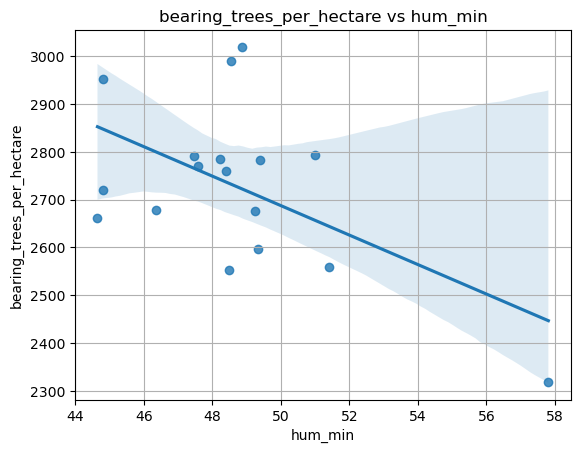

Pearson correlation between bearing_trees_per_hectare and hum_min: -0.55


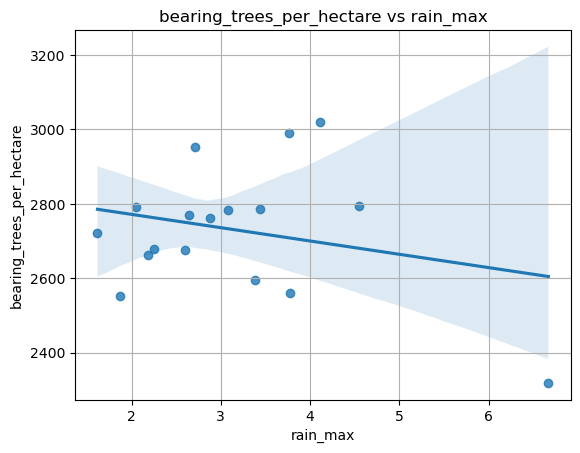

Pearson correlation between bearing_trees_per_hectare and rain_max: -0.25


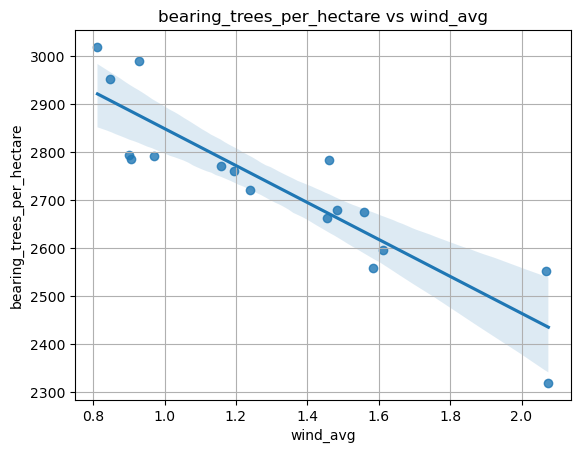

Pearson correlation between bearing_trees_per_hectare and wind_avg: -0.89


In [91]:
# Define the weather variables to compare
weather_cols = ['temp_avg', 'hum_min', 'rain_max', 'wind_avg']

# Define the coffee-related outcome variable
coffee_col = 'bearing_trees_per_hectare'

# Loop through each weather variable to analyze its relationship with coffee production
for var in weather_cols:
    
    # Create a scatterplot with a regression line to show the relationship
    sns.regplot(x=var, y=coffee_col, data=wc_combined)
    plt.title(f'{coffee_col} vs {var}')
    plt.xlabel(var)
    plt.ylabel(coffee_col)
    plt.grid(True)
    plt.show()

    # Pearson correlation
    corr = wc_combined[var].corr(wc_combined[coffee_col])
    print(f"Pearson correlation between {coffee_col} and {var}: {corr:.2f}")

Perform the same bivariate analysis between the mentioned weather columns (temp_avg, hum_min, rain_max, and wind_avg) and a coffee-related column of your choice (bearing_trees, nonbearing_trees, bearing_trees_per_hectare, etc). Which directions do these relationships follow? What are the strengths of these relationships?

Answer: For this bivariate analysis, I examined the relationships between each weather variable (temp_avg, hum_min, rain_max, and wind_avg) and the coffee-related variable bearing_trees_per_hectares using Pearson's correlation coefficient and a heat map. The data has led me to conclude:

-Pearson correlation between bearing_trees_per_hectare and temp_avg: -0.43 = negative (direction) and moderate (strength)

-Pearson correlation between bearing_trees_per_hectare and hum_min: -0.55 = negative (direction) and strong (strength)

-Pearson correlation between bearing_trees_per_hectare and rain_max: -0.25 = negative (direction) and weak (strength)

-Pearson correlation between bearing_trees_per_hectare and wind_avg: -0.89 = negative (direction) and strong (strength)

Final conclusion:
Since the wind average and minimum humidity are negative and strong relationships this suggests that when the wind and humidity increase the production of coffee bearing trees per hectare decreases significantly. Also, it appears that since the relationships between the maximum rain and temperature average are negative but with a weak to moderate strength, these variables play less of a role on the number of bearing trees per hectare. 

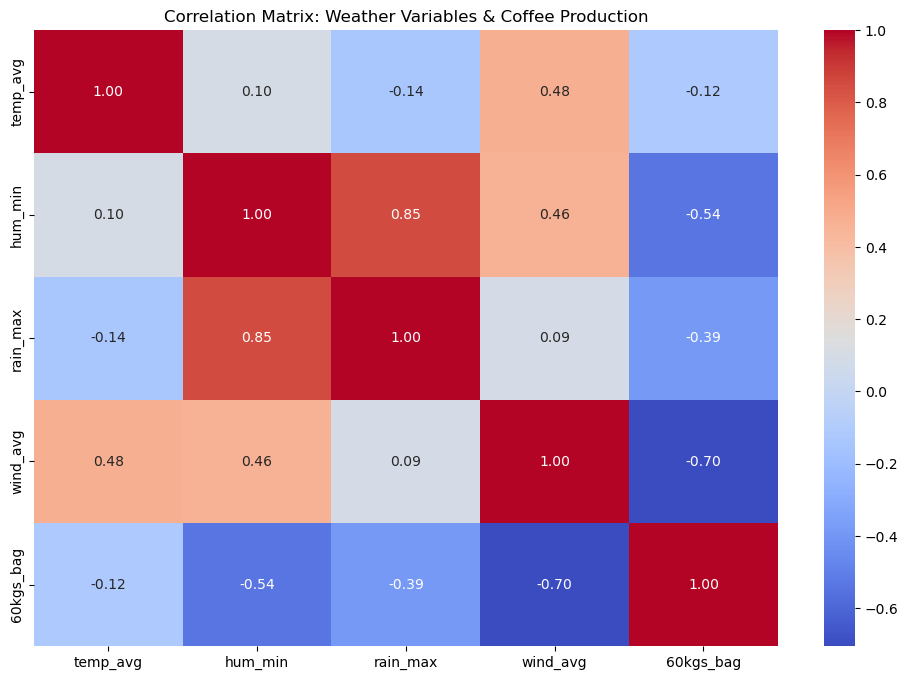

In [77]:
# Define the columns to include in the correlation analysis
weather_columns = ['temp_avg', 'hum_min', 'rain_max', 'wind_avg', '60kgs_bag']

# Calculate the Pearson correlation matrix
correlation_matrix = wc_combined[weather_columns].corr(method='pearson')

# Create a heatmap to visualize correlation strengths and directions
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Weather Variables & Coffee Production')
plt.show()

In [33]:
# Define weather variables to compare
weather_vars1 = ['temp_avg', 'hum_min', 'rain_max', 'wind_avg']

# Define the coffee production variable
coffee_var1 = '60kgs_bag'

# Loop through each weather variable to calculate its correlation with coffee production
for var in weather_vars1:
    
    # Calculate Pearson correlation between the weather variable and coffee production
    corr = wc_combined[var].corr(wc_combined[coffee_var1])
    
    # Print the correlation value rounded to two decimal places
    print(f"Correlation between {var} and {coffee_var1} is {corr:.2f}")


Correlation between temp_avg and 60kgs_bag is -0.12
Correlation between hum_min and 60kgs_bag is -0.54
Correlation between rain_max and 60kgs_bag is -0.39
Correlation between wind_avg and 60kgs_bag is -0.70


In [34]:
# Define weather variables to compare
weather_vars2 = ['temp_avg', 'hum_min', 'rain_max', 'wind_avg']

# Define the coffee production variable
coffee_var2= 'bearing_trees'

# Loop through each weather variable to calculate its correlation with coffee production
for var in weather_vars2:
    
    # Calculate Pearson correlation between the weather variable and coffee production
    corr = wc_combined[var].corr(wc_combined[coffee_var2])
    
    # Print the correlation value rounded to two decimal places
    print(f"Correlation between {var} and {coffee_var2} is {corr:.2f}")

Correlation between temp_avg and bearing_trees is -0.43
Correlation between hum_min and bearing_trees is -0.59
Correlation between rain_max and bearing_trees is -0.33
Correlation between wind_avg and bearing_trees is -0.60


In [35]:
# Define weather variables to compare
weather_vars3 = ['temp_avg', 'hum_min', 'rain_max', 'wind_avg']

# Define the coffee production variable
coffee_var3= 'bearing_hectares'

# Loop through each weather variable to calculate its correlation with coffee production
for var in weather_vars3:
    
    # Calculate Pearson correlation between the weather variable and coffee production
    corr = wc_combined[var].corr(wc_combined[coffee_var3])
    
    # Print the correlation value rounded to two decimal places
    print(f"Correlation between {var} and {coffee_var3} is {corr:.2f}")

Correlation between temp_avg and bearing_hectares is 0.34
Correlation between hum_min and bearing_hectares is 0.43
Correlation between rain_max and bearing_hectares is 0.18
Correlation between wind_avg and bearing_hectares is 0.93


Which weather factor seems to influence coffee production the most? 

Answer: Among the variables examined, the wind speed appears to affect the amount of coffee produced. Thinking specifically about the corrleation between the average wind speed and the 60kgs bags of coffee produced, the Pearson correlation is -0.70, which is a strong negative relationship.

This means that as the wind speed increase, coffee production decreases significantly. It's safe to infer that higher winds negatively impact the amount of coffee a farmer is able to produce, likely due to physical damage. 

Which data would you collect to continue exploring the impacts of weather and economic forces on coffee production?

Answer: To get a better understanding and continue exploring the impacts of weather and economic forces, I would like to collect data surrounding soil moisture levels, sunlight hours, and the market prices for coffee. Since healthy soil and exposure to sunlight are crucial for coffee plant health, therefore production, I believe these factors would be important to monitor as they directly impact the quality and quantity of the coffee produced. Furthermore, from an economic standpoint, monitoring the market prices would also be a factor I would collect around because this factor plays a major role in decision making, for farmers and stakeholders. When prices are high, the investment in the crop will likely increase, versus when prices drop and the need is not there, this may delay harvests and production.

If you were preparing a report to provide coffee farmers, which weather condititions would you state are the most favorable for coffee growing (assuming any exist)?

Answer: Based on the data gathered, I believe it's safe to say that the best farming conditions include calm winds, moderate humidity, consistent and moderate rain (not too much or too little), and warm temperatures. 

Since there is a strong negative correlation between wind speed and coffee production, calmer conditions are more likely to produce higher percentages of coffee bags production. While excessive rainfall does not strongly improve yield and may even reduce it slightly, consistent and moderate rain likely supports healthy soil moisture and steady growth. Temperature showed the weakest relationship with the amount of coffee produced, but when consistent, moderate warmth (not too hot or cold) it's safe to assume this helps maintain plant health as well, allowing farmers to reap more benefits.